In [1]:
import h5py
import numpy as np
from typing import List
import matplotlib.pyplot as plt

def read_h5(filename: str) -> List[np.ndarray]:
    with h5py.File(filename, "r") as f:
        a_group_key = list(f.keys())[0]

        data = list(f[a_group_key])

        return data

In [7]:
data = np.array(read_h5('../Datasets/real_data_TPV/data_TPV_versao_1.h5'))#.reshape(-1, 8)

In [16]:
for i in range(8):
    print(f"channel: {i + 1} | media: {data[:, i].mean()}\
    | min {data[:, i].min()} | max {data[:, i].max()} | desvio padrao {data[:, i].std()}")

channel: 1 | media: 20.0    | min 20 | max 20 | desvio padrao 0.0
channel: 2 | media: 30.0    | min 30 | max 30 | desvio padrao 0.0
channel: 3 | media: 21.0    | min 21 | max 21 | desvio padrao 0.0
channel: 4 | media: -12.0    | min -12 | max -12 | desvio padrao 0.0
channel: 5 | media: 359.0    | min 359 | max 359 | desvio padrao 0.0
channel: 6 | media: 46.0    | min 46 | max 46 | desvio padrao 0.0
channel: 7 | media: 24.0    | min 24 | max 24 | desvio padrao 0.0
channel: 8 | media: 6.0    | min 6 | max 6 | desvio padrao 0.0


<Figure size 640x480 with 0 Axes>

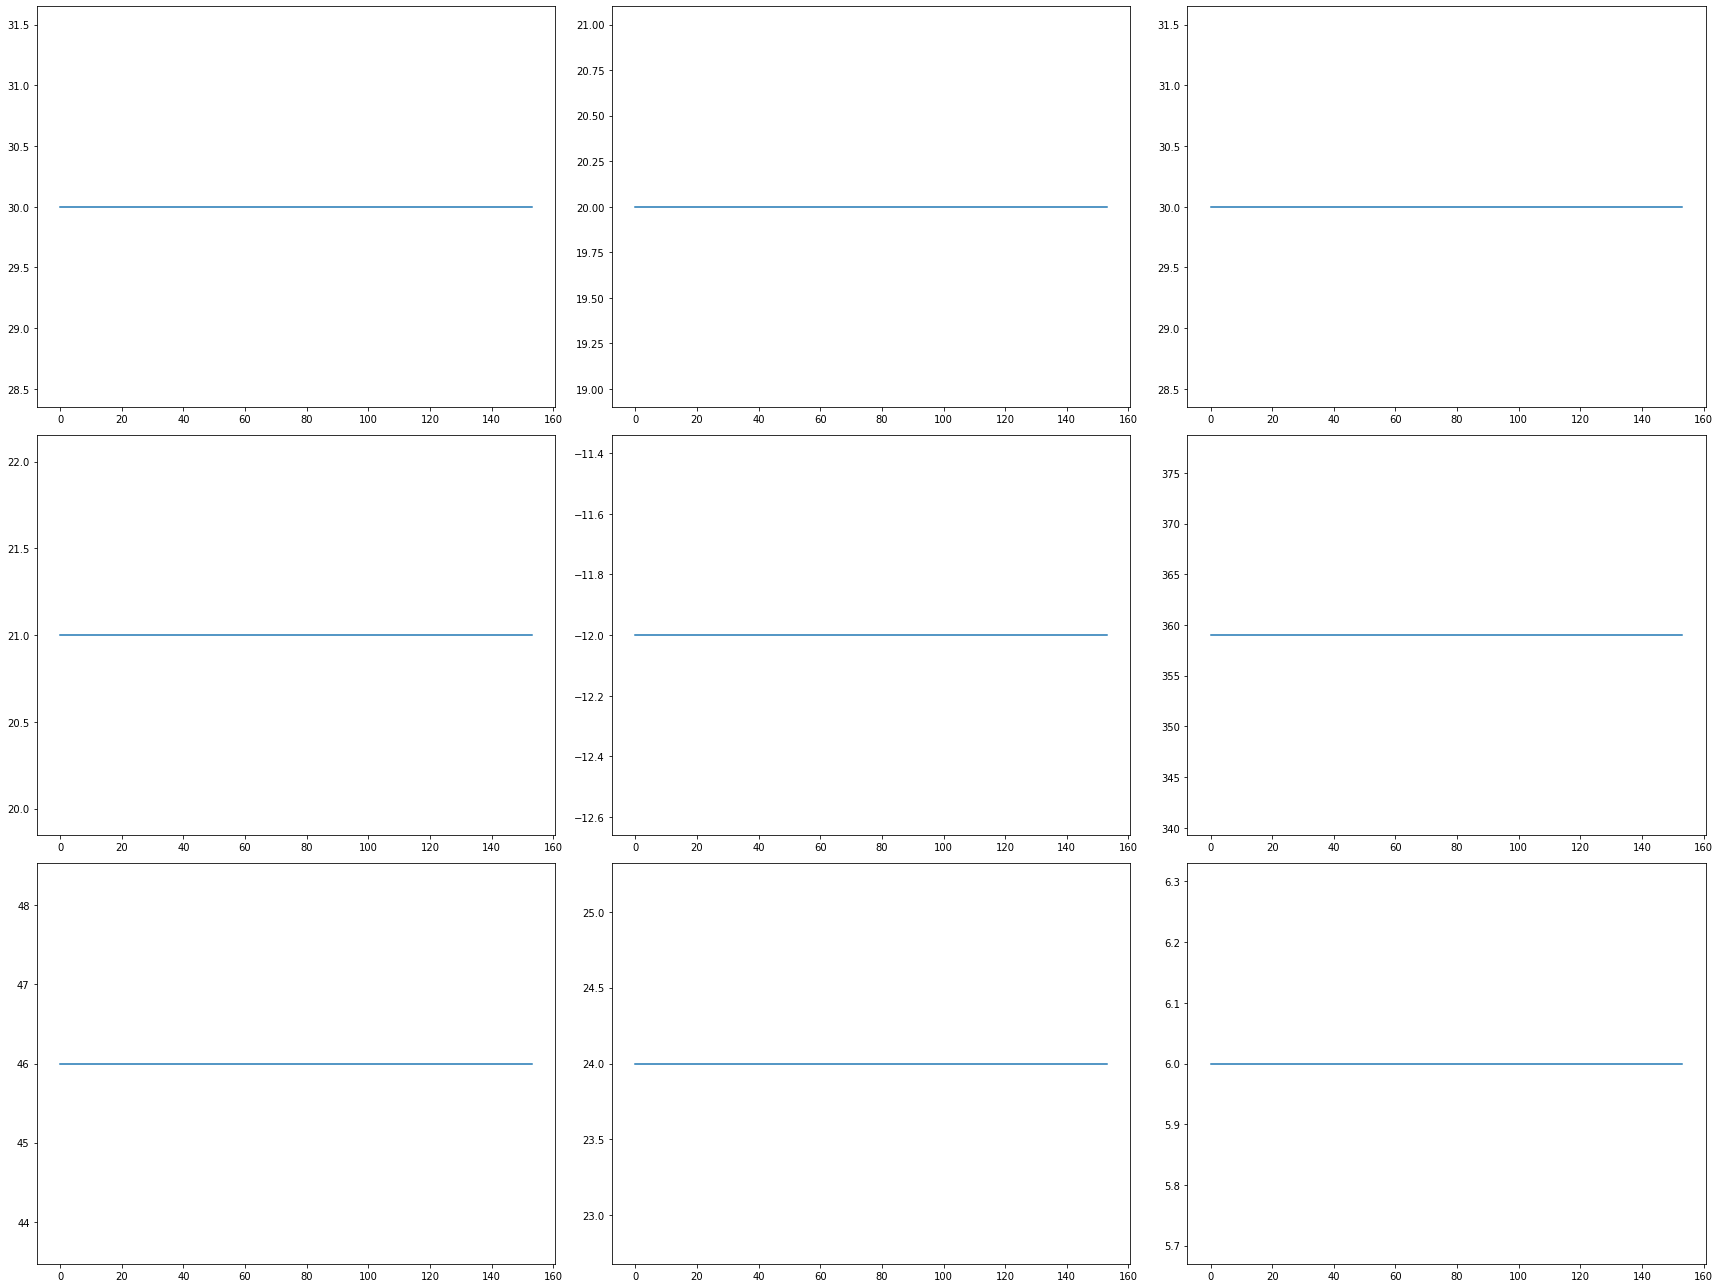

In [10]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

limiter = 2000

#plt.plot(data_normal_train[:limiter,0])

fig, axs = plt.subplots(3, 3, figsize=(24, 18))

feature_channel = 1

axs[0, 0].plot(data[:limiter, feature_channel])

axs[0, 1].plot(data[:,0])
axs[0, 2].plot(data[:,1])
axs[1, 0].plot(data[:,2])
axs[1, 1].plot(data[:,3])
axs[1, 2].plot(data[:,4])
axs[2, 0].plot(data[:,5])
axs[2, 1].plot(data[:,6])
axs[2, 2].plot(data[:,7])

fig.tight_layout()

<Figure size 640x480 with 0 Axes>

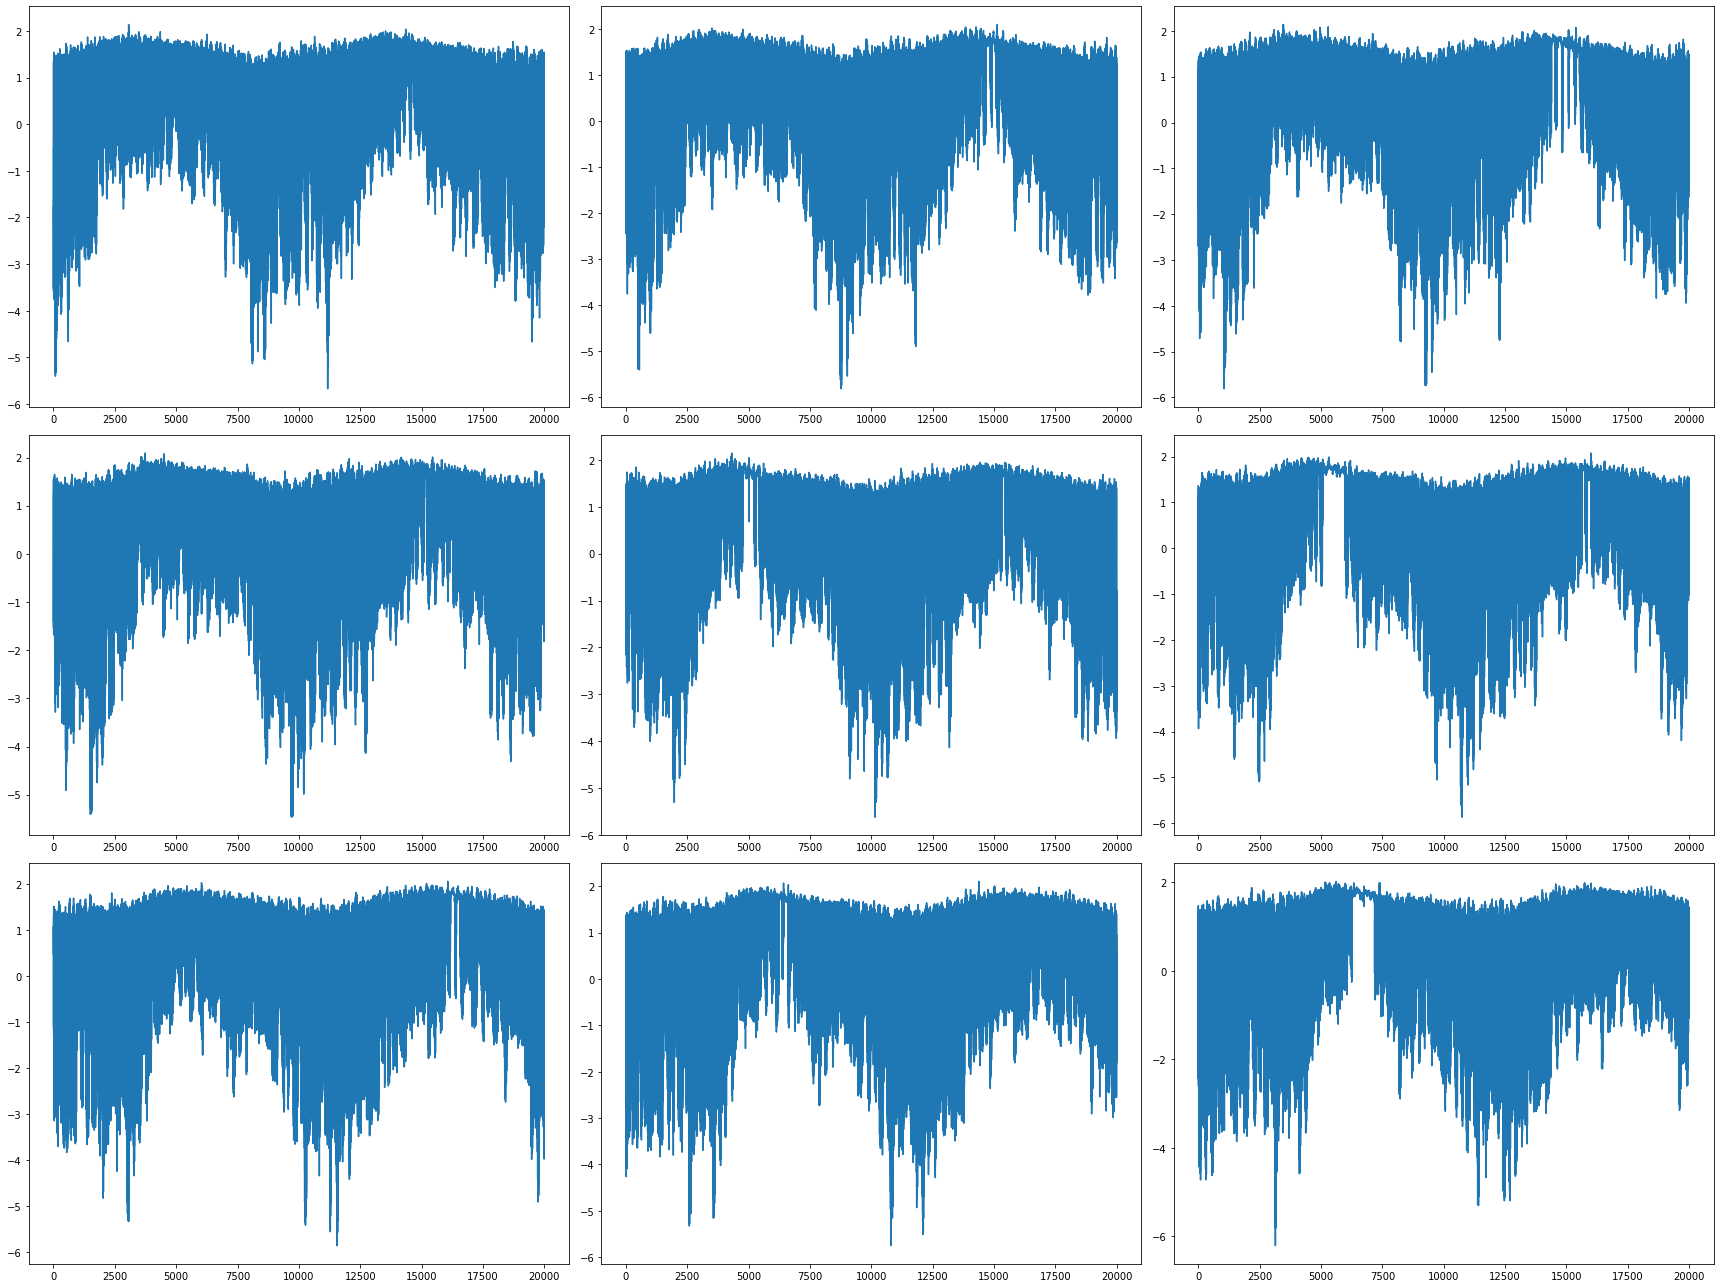

In [6]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

limiter = 20000

#plt.plot(data_normal_train[:limiter,0])

fig, axs = plt.subplots(3, 3, figsize=(24, 18))

feature_channel = 1

axs[0, 0].plot(data_failure_train[:limiter, feature_channel])

axs[0, 1].plot(data_failure_train[limiter:2*limiter,feature_channel])
axs[0, 2].plot(data_failure_train[2*limiter:3*limiter,feature_channel])
axs[1, 0].plot(data_failure_train[3*limiter:4*limiter,feature_channel])
axs[1, 1].plot(data_failure_train[4*limiter:5*limiter, feature_channel])
axs[1, 2].plot(data_failure_train[5*limiter:6*limiter,feature_channel])
axs[2, 0].plot(data_failure_train[6*limiter:7*limiter,feature_channel])
axs[2, 1].plot(data_failure_train[7*limiter:8*limiter,feature_channel])
axs[2, 2].plot(data_failure_train[8*limiter:9*limiter,feature_channel])

fig.tight_layout()

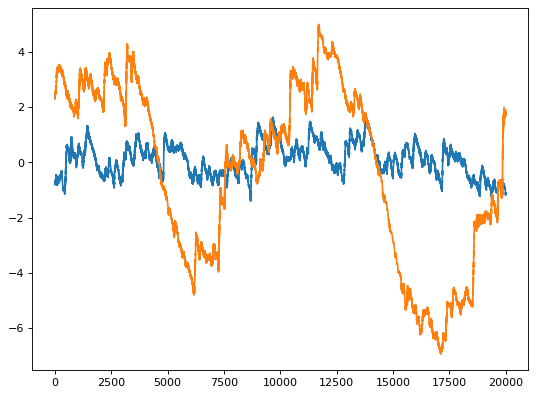

In [7]:
figure(figsize=(8, 6), dpi=80)

feature_channel = 4

shift = 3

plt.plot(data_normal_train[(shift - 1)*limiter:shift*limiter, feature_channel])
plt.plot(data_failure_train[(shift - 1)*limiter:shift*limiter, feature_channel])

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def read_csv_uci(filename: str):
    dataset = pd.read_csv(filename)

    x_dataset = dataset.drop(columns=['UDI', 'Product ID', 'Type', #'Tool wear [min]',
                                      'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
                                      'RNF'])

    y_dataset = dataset.drop(columns=['UDI', 'Product ID', 'Type', 'Air temperature [K]',
                                      'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
                                      'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF',
                                      'RNF'])

    matrix_channels = np.array([np.array((x_dataset[feature].tolist())) for feature in x_dataset.keys()])

    y_data_array = np.array(y_dataset['Machine failure'].tolist())

    return matrix_channels, y_data_array


In [9]:
matrix_channels, y_data_array = read_csv_uci('../dataset_free/uci_base_machine_learning.csv')

In [10]:
#y_data_array
matrix_channels[feature_channel, :]

feature_channel = 0
mark = []

for i in range(len(y_data_array)):
    if y_data_array[i] == 1:
        mark.append(matrix_channels[feature_channel, i])
    else:
        mark.append(0)

marke = []
index = []
for i in zip(np.arange(len(mark)), mark):
    if i[1] == 0:
        continue
    
    marke.append(i[1])
    index.append(i[0])

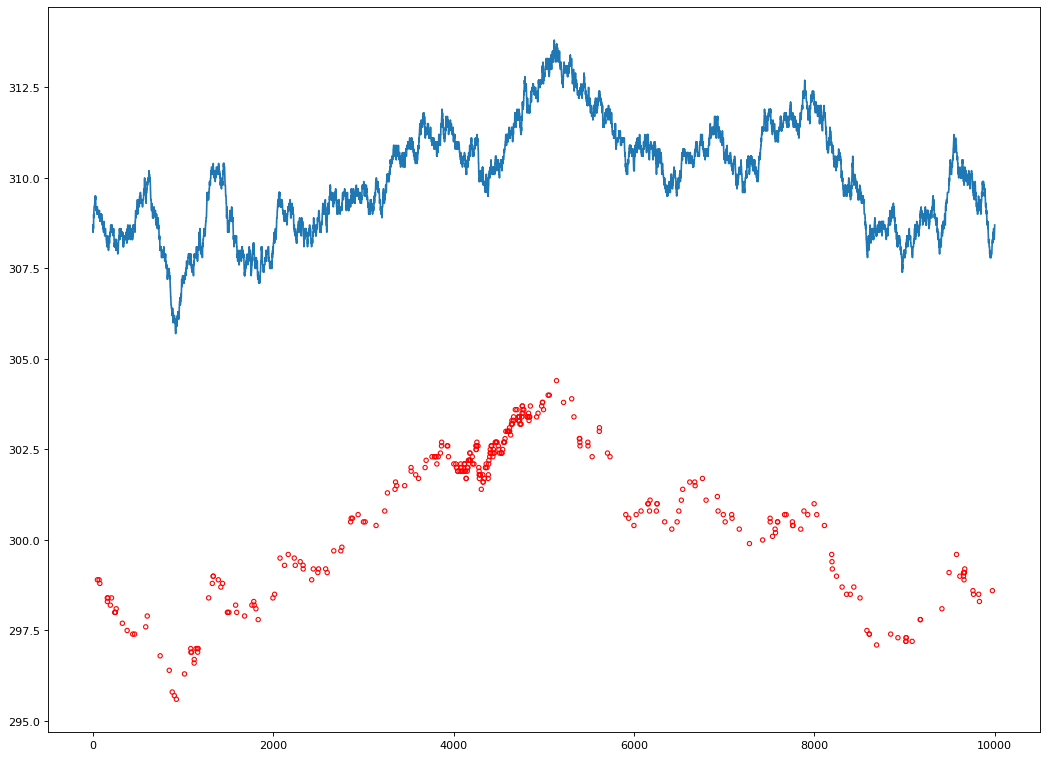

In [11]:
from matplotlib.pyplot import figure

feature_channel = 1
figure(figsize=(16, 12), dpi=80)

plt.plot(matrix_channels[feature_channel, :])
plt.scatter(index, marke, s=15, facecolors='none', edgecolors='r')
#plt.scatter(np.arange(len(mark)), mark, s=2)
plt.show()

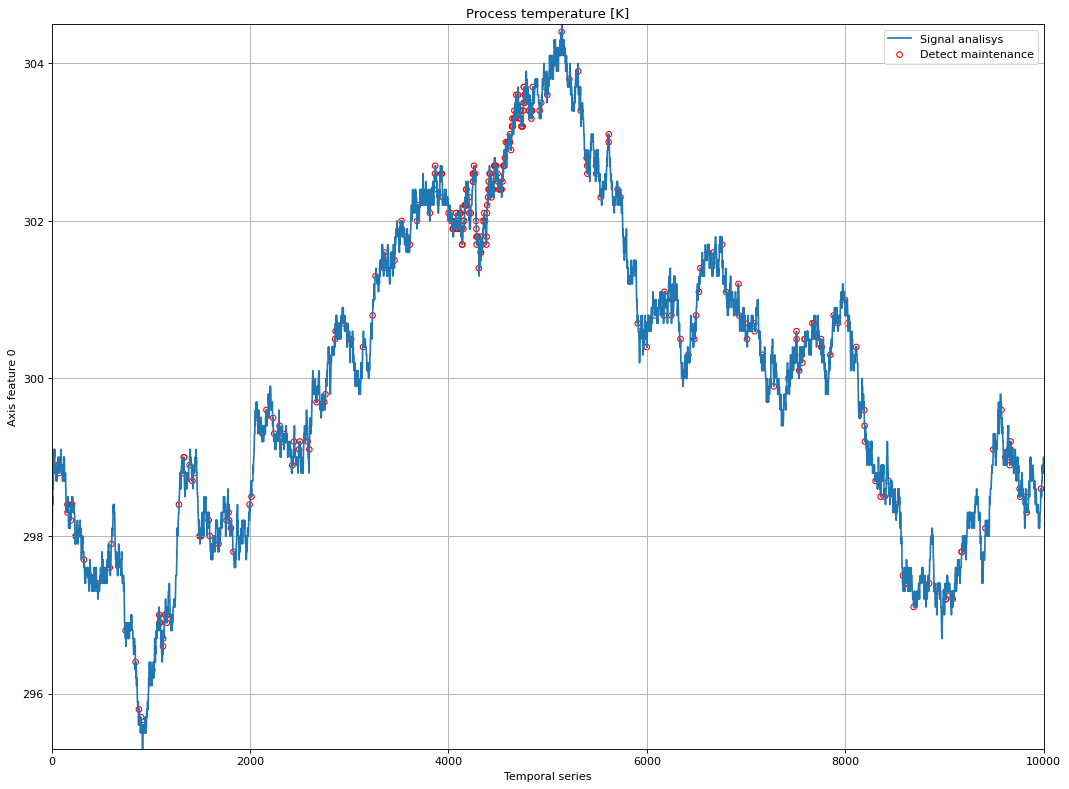

In [12]:
#y_data_array

feature_channel = 0
mark = []

for i in range(len(y_data_array)):
    if y_data_array[i] == 1:
        mark.append(matrix_channels[feature_channel, i])
    else:
        mark.append(0)

marke = []
index = []
for i in zip(np.arange(len(mark)), mark):
    if i[1] == 0:
        continue
    
    marke.append(i[1])
    index.append(i[0])

from matplotlib.pyplot import figure

figure(figsize=(16, 12), dpi=80)

plt.plot(matrix_channels[feature_channel, :], label='Signal analisys')
plt.xlabel('Temporal series')
#plt.title("Air temperature [K]")
plt.title("Process temperature [K]")
plt.ylabel(f'Axis feature {feature_channel}')
plt.grid(True)
plt.xlim([0, len(matrix_channels[feature_channel, :])])
plt.ylim([min(matrix_channels[feature_channel, :]), max(matrix_channels[feature_channel, :])])
plt.scatter(index, marke, s=25, facecolors='none', edgecolors='r', label='Detect maintenance')
plt.legend()
#plt.scatter(np.arange(len(mark)), mark, s=2)
plt.show()